In [1]:
import pandas as pd
df = pd.read_csv('heart.csv')
import numpy as np

In [2]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [4]:
x = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

In [5]:
print(x.shape,y.shape)

(918, 11) (918,)


In [6]:
from sklearn.preprocessing import LabelEncoder

x = x.apply(LabelEncoder().fit_transform)


In [7]:
x.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,12,1,1,41,147,0,1,98,0,10,2
1,21,0,2,55,40,0,1,82,0,20,1
2,9,1,1,31,141,0,2,25,0,10,2
3,20,0,0,39,72,0,1,34,1,25,1
4,26,1,2,49,53,0,1,48,0,10,2


In [8]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [9]:
print(x_train.shape , x_test.shape)

(734, 11) (184, 11)


In [10]:
x_train = np.array(x_train)
x_test = np.array(x_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [11]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)


In [12]:
import tensorflow as tf
from tensorflow import keras

In [49]:
model = keras.Sequential()
model.add(keras.layers.Input(shape=(11,)))
model.add(keras.layers.Dense(512, activation='relu'))
model.add(keras.layers.Dropout(0.8))
model.add(keras.layers.Dense(256, activation='relu'))
model.add(keras.layers.Dropout(0.6))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.compile(optimizer=keras.optimizers.Adam(), loss=keras.losses.binary_crossentropy, metrics=['Accuracy'])

In [50]:
hist=model.fit(x_train, y_train, epochs=200, batch_size=128, validation_data=(x_test, y_test))

Epoch 1/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - Accuracy: 0.5202 - loss: 0.7013 - val_Accuracy: 0.6196 - val_loss: 0.6066
Epoch 2/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - Accuracy: 0.6688 - loss: 0.6104 - val_Accuracy: 0.8043 - val_loss: 0.5374
Epoch 3/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - Accuracy: 0.7563 - loss: 0.5383 - val_Accuracy: 0.8098 - val_loss: 0.4772
Epoch 4/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - Accuracy: 0.8011 - loss: 0.4809 - val_Accuracy: 0.7880 - val_loss: 0.4408
Epoch 5/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step - Accuracy: 0.8142 - loss: 0.4268 - val_Accuracy: 0.7935 - val_loss: 0.4245
Epoch 6/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.8246 - loss: 0.4344 - val_Accuracy: 0.8098 - val_loss: 0.4130
Epoch 7/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - Accuracy: 0.8327 - loss: 0.3972 - val_Accuracy: 0.8098 - val_loss: 0.4067
Epoch 8/200
6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step - Accuracy: 0.8379 - loss: 0.4062 - val_Accuracy: 0.8152 - val_loss:

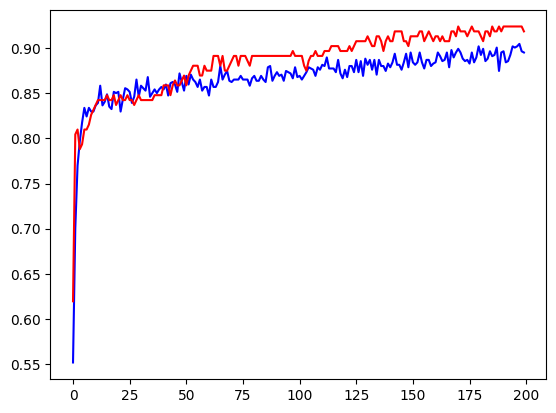

In [51]:
import matplotlib.pyplot as plt
plt.plot(hist.history['Accuracy'], color='blue')
plt.plot(hist.history['val_Accuracy'], color='red')

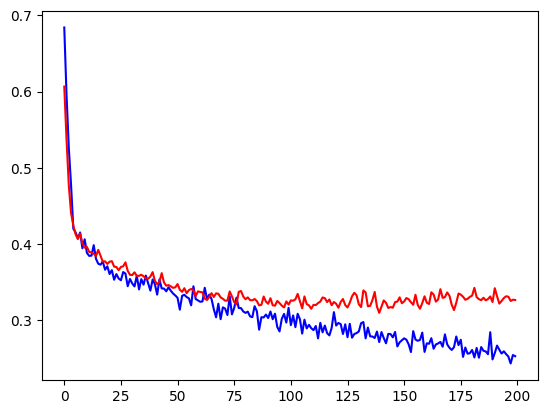

In [52]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'], color='blue')
plt.plot(hist.history['val_loss'], color='red')